In [306]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-behaviour/user_behavior_dataset.csv



### About Dataset
This dataset provides a comprehensive analysis of mobile device usage patterns and user behavior classification. It contains 700 samples of user data, including metrics such as app usage time, screen-on time, battery drain, and data consumption. Each entry is categorized into one of five user behavior classes, ranging from light to extreme usage, allowing for insightful analysis and modeling.

### Key Features:

User ID: Unique identifier for each user.
Device Model: Model of the user's smartphone.
Operating System: The OS of the device (iOS or Android).
App Usage Time: Daily time spent on mobile applications, measured in minutes.
Screen On Time: Average hours per day the screen is active.
Battery Drain: Daily battery consumption in mAh.
Number of Apps Installed: Total apps available on the device.
Data Usage: Daily mobile data consumption in megabytes.
Age: Age of the user.
Gender: Gender of the user (Male or Female).
User Behavior Class: Classification of user behavior based on usage patterns (1 to 5).
This dataset is ideal for researchers, data scientists, and analysts interested in understanding mobile user behavior and developing predictive models in the realm of mobile technology and applications.

In [307]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer 
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords')
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [309]:
df=pd.read_csv('/kaggle/input/mobile-behaviour/user_behavior_dataset.csv')

In [310]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [312]:
df.shape

(700, 11)

In [313]:
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [314]:
df['User Behavior Class'].value_counts()
# balance Target value

User Behavior Class
2    146
3    143
4    139
5    136
1    136
Name: count, dtype: int64

# Data Visualization

In [315]:
df.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [316]:
# Rename the Column Name 
df.rename(columns={'App Usage Time (min/day)': 'App_Usage_Time_min'}, inplace=True)
df.rename(columns={'Screen On Time (hours/day)': 'Screen_On_Time_hours'}, inplace=True)
df.rename(columns={'Battery Drain (mAh/day)': 'Battery_Drain_mAh'}, inplace=True)
df.rename(columns={'Data Usage (MB/day)': 'Data_Usage_MB'}, inplace=True)

In [317]:
df.head(2)

,User ID,Device Model,Operating System,App_Usage_Time_min,Screen_On_Time_hours,Battery_Drain_mAh,Number of Apps Installed,Data_Usage_MB,Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3


In [318]:
for i in df.columns:
    print(f'{i}:{df[i].unique()}')

User ID:[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 24

In [319]:
df_cat=df.select_dtypes(include='object')

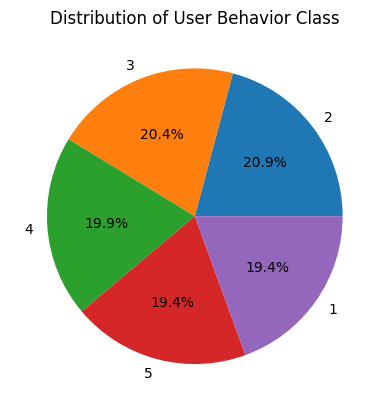

<Figure size 640x480 with 0 Axes>

In [320]:
class_counts = df['User Behavior Class'].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Distribution of User Behavior Class')
plt.show()
plt.savefig('Distribution of User Behavior Class')

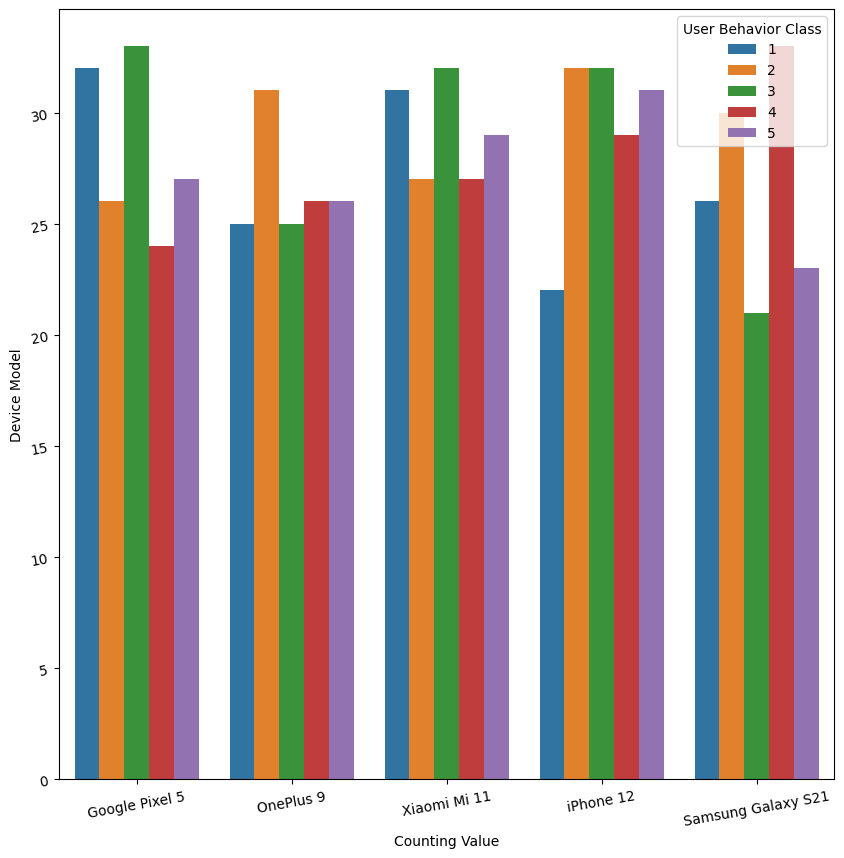

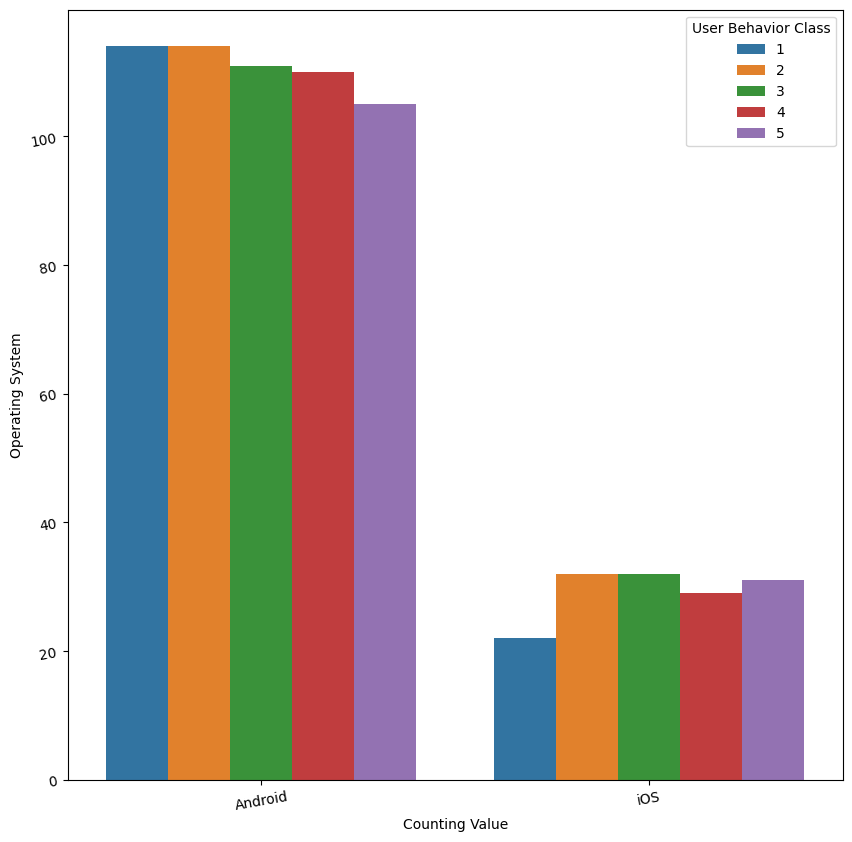

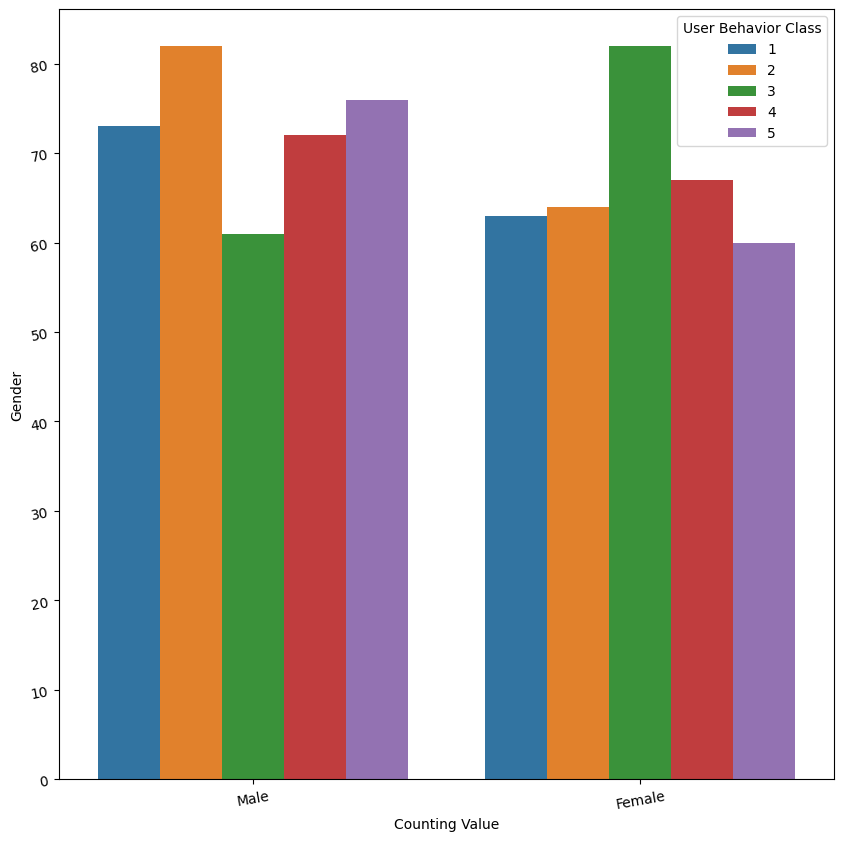

In [321]:
for i in df_cat:
    plt.figure(figsize=(10,10))
    x=sns.countplot(x=df[i],hue=df['User Behavior Class'])
    plt.xticks(rotation=10)
    plt.yticks(rotation=10)
    plt.xlabel('Counting Value')
    plt.ylabel(i)
    plt.show()

In [322]:
df_int=df.select_dtypes(exclude='object')
df_int.head(1)

,User ID,App_Usage_Time_min,Screen_On_Time_hours,Battery_Drain_mAh,Number of Apps Installed,Data_Usage_MB,Age,User Behavior Class
0,1,393,6.4,1872,67,1122,40,4


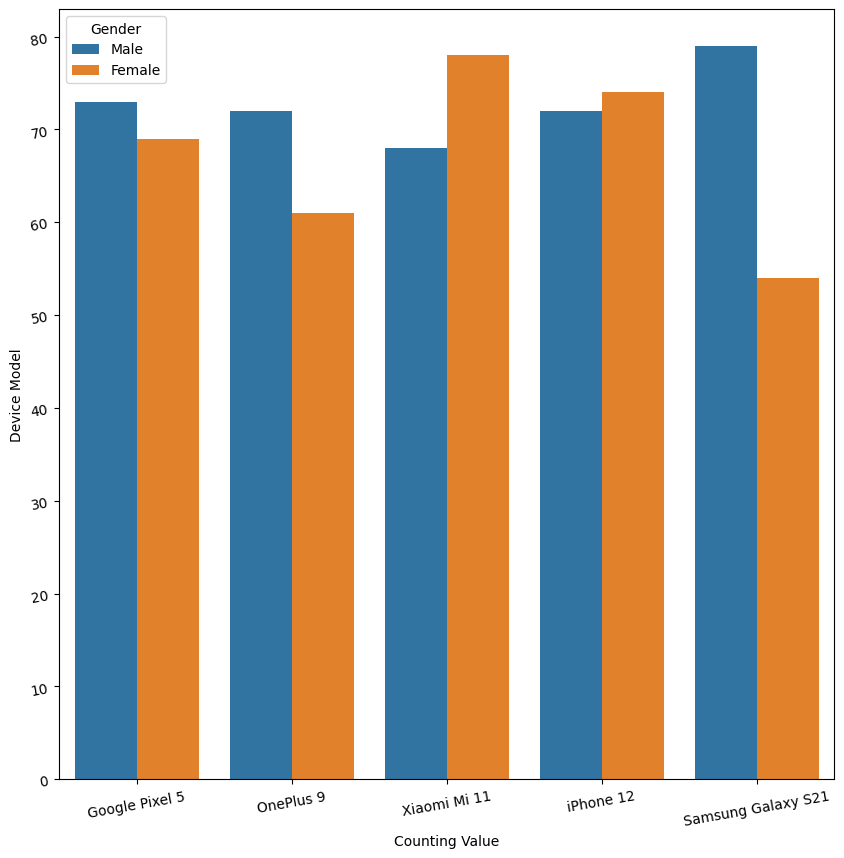

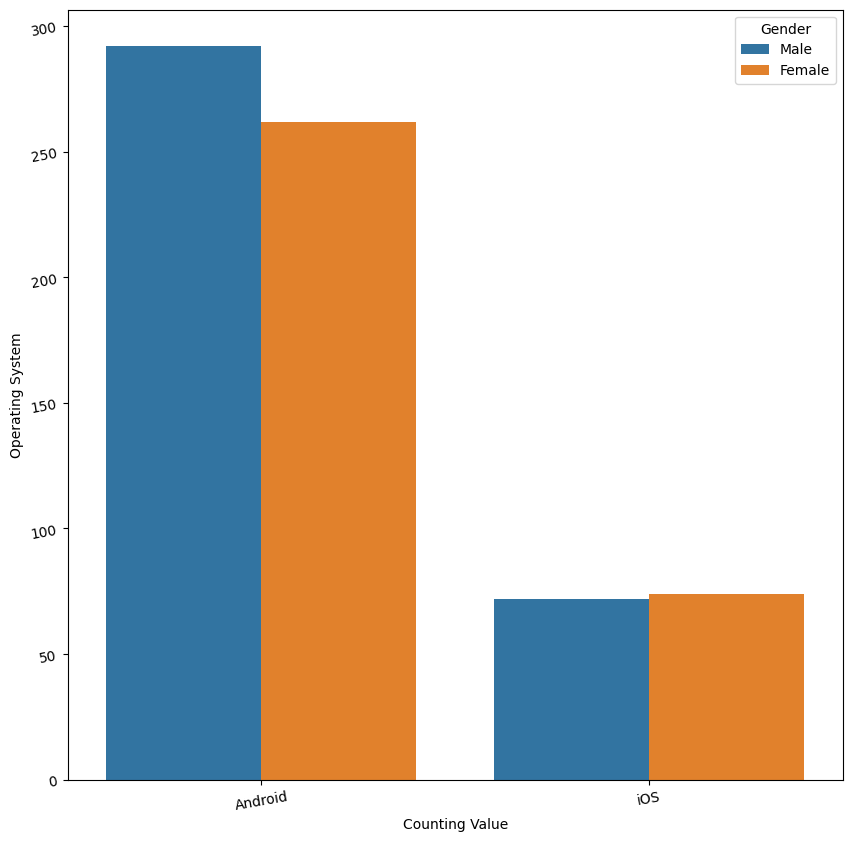

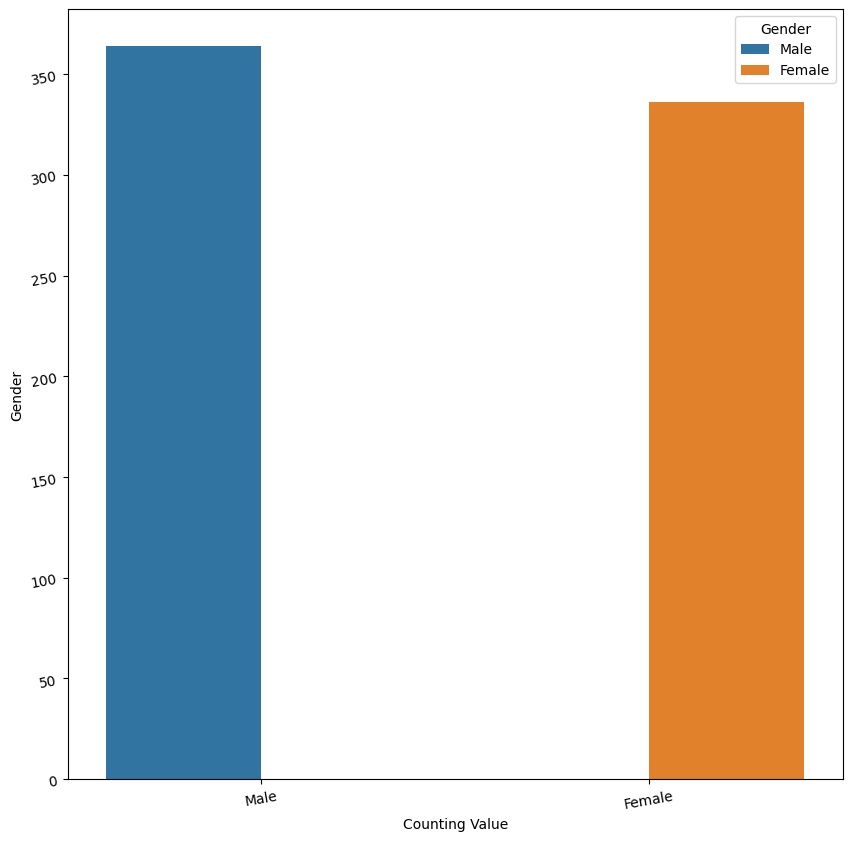

Operation  System


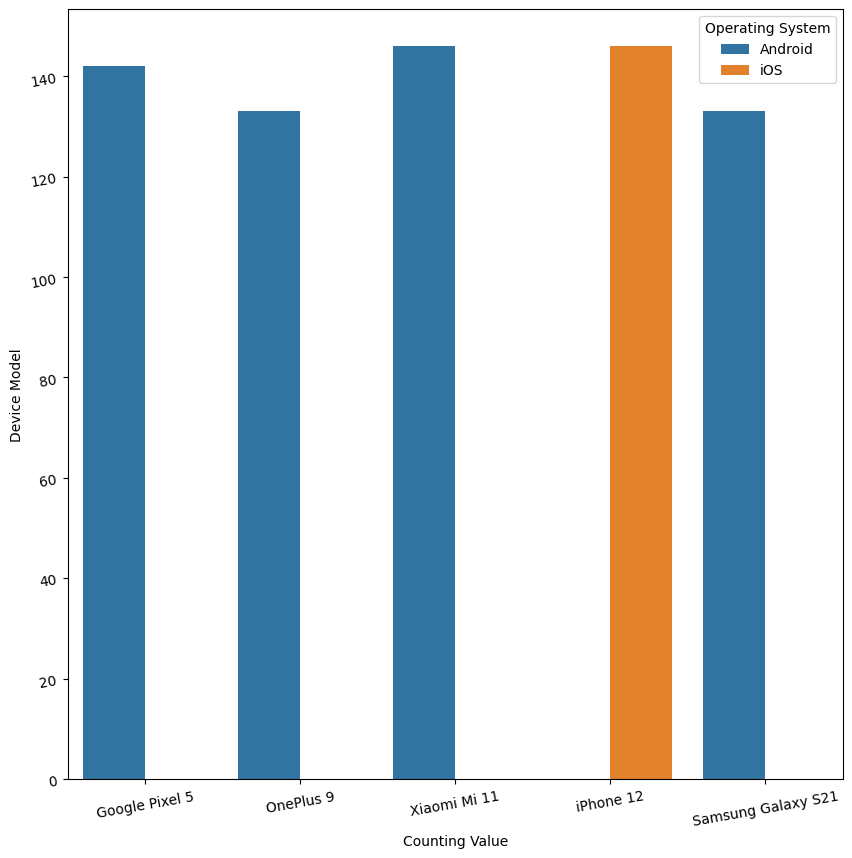

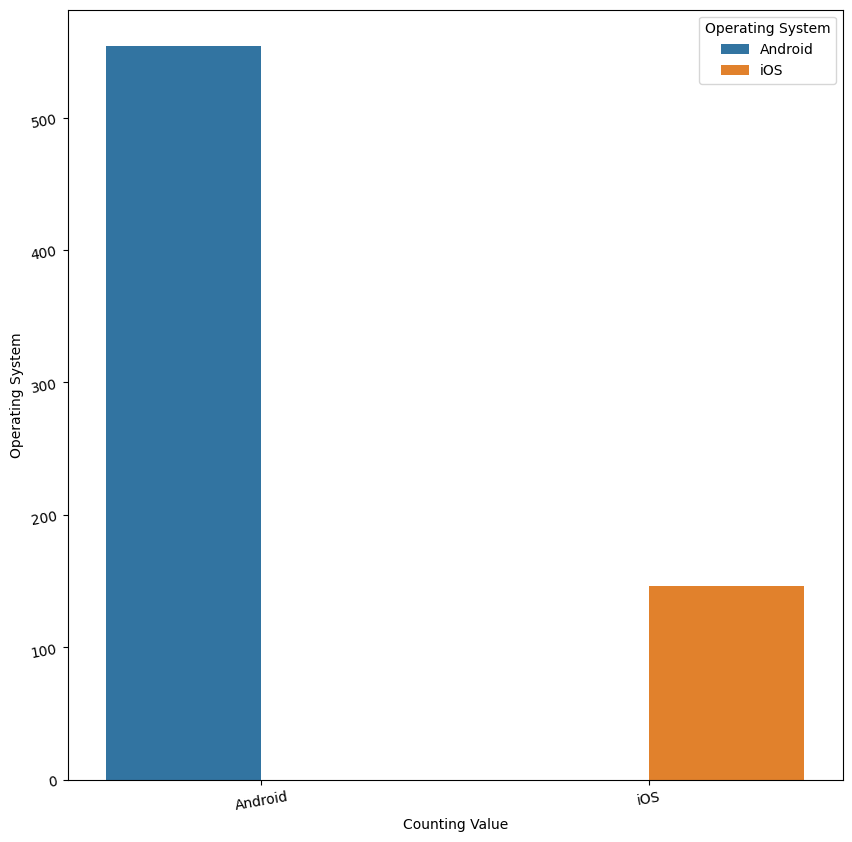

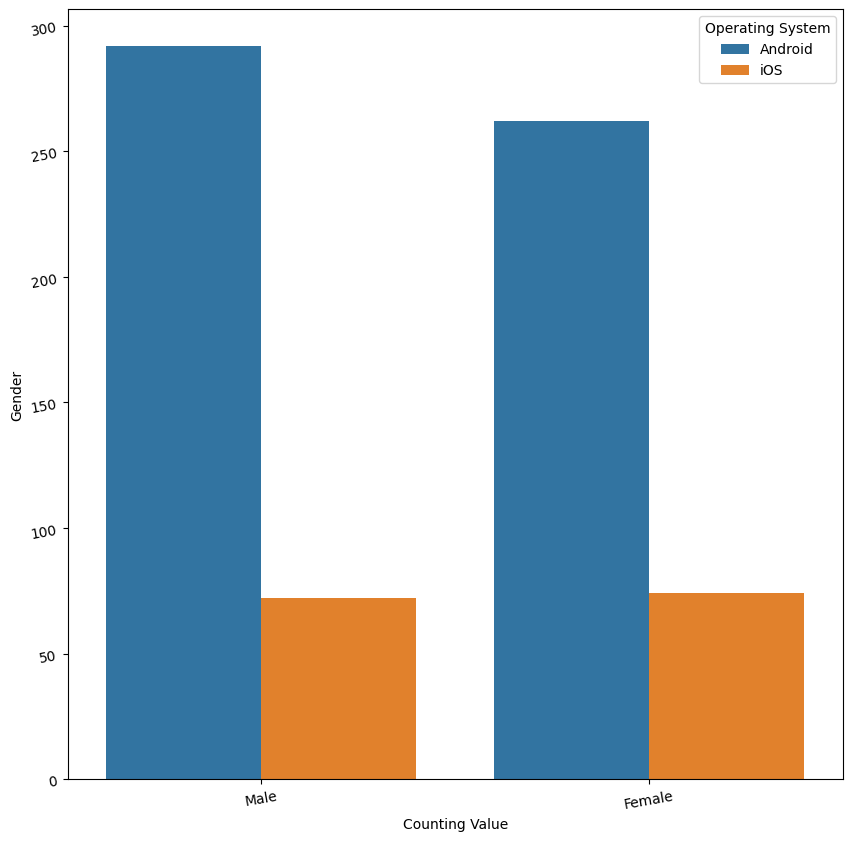

In [323]:
for i in df_cat:
    plt.figure(figsize=(10,10))
    x=sns.countplot(x=df[i],hue=df['Gender'])
    plt.xticks(rotation=10)
    plt.yticks(rotation=10)
    plt.xlabel('Counting Value')
    plt.ylabel(i)
    plt.show()
    
print('Operation  System')
    
for i in df_cat:
    plt.figure(figsize=(10,10))
    x=sns.countplot(x=df[i],hue=df['Operating System'])
    plt.xticks(rotation=10)
    plt.yticks(rotation=10)
    plt.xlabel('Counting Value')
    plt.ylabel(i)
    plt.show()

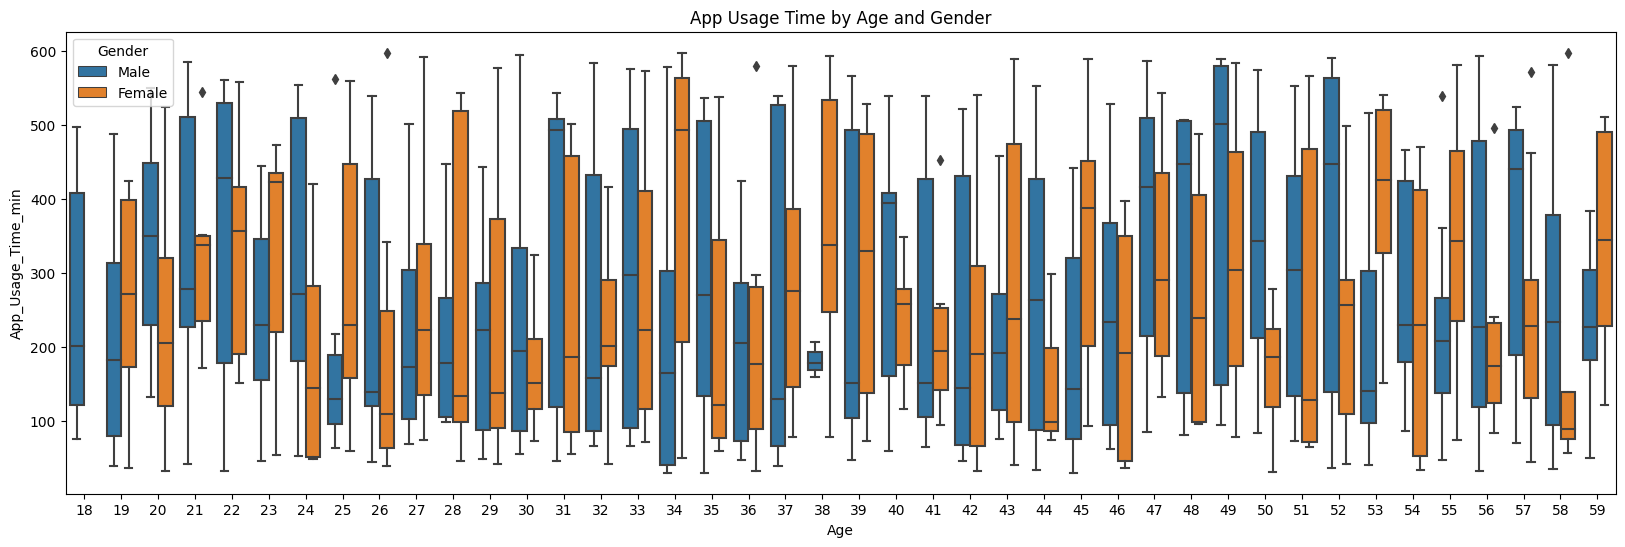

In [324]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='Age', y='App_Usage_Time_min', hue='Gender', data=df)
plt.title('App Usage Time by Age and Gender')
plt.show()

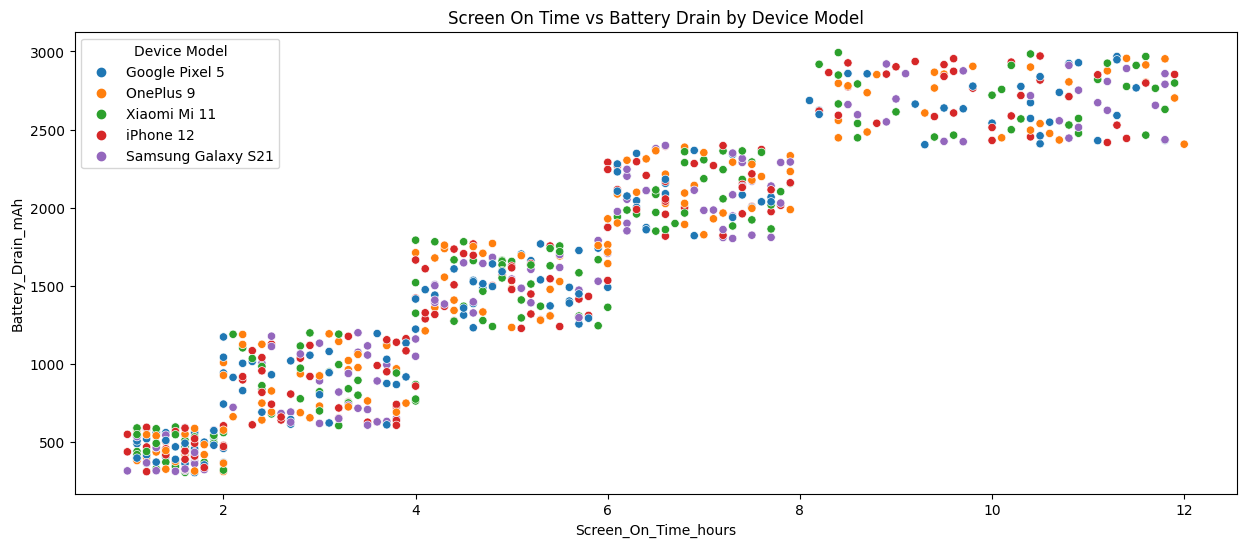

In [325]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Screen_On_Time_hours', y='Battery_Drain_mAh', hue='Device Model', data=df)
plt.title('Screen On Time vs Battery Drain by Device Model')
plt.show()

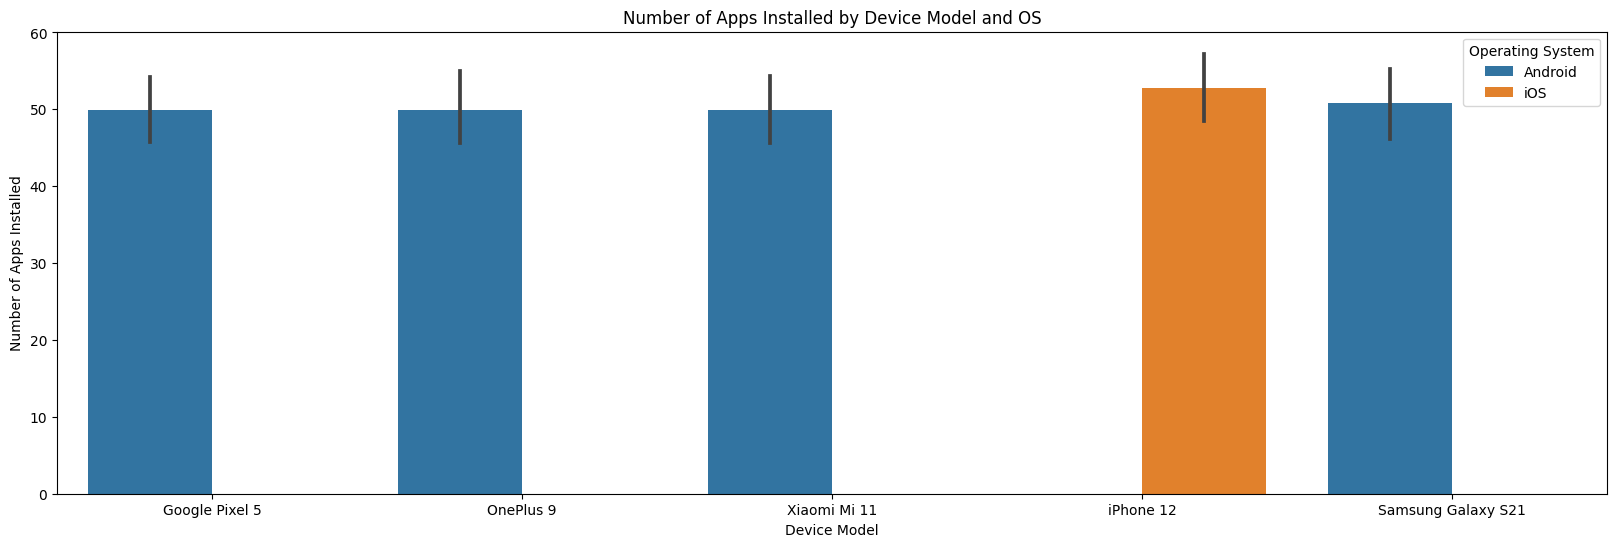

In [326]:
plt.figure(figsize=(20, 6))
sns.barplot(x='Device Model', y='Number of Apps Installed', hue='Operating System', data=df)
plt.title('Number of Apps Installed by Device Model and OS')
plt.show()

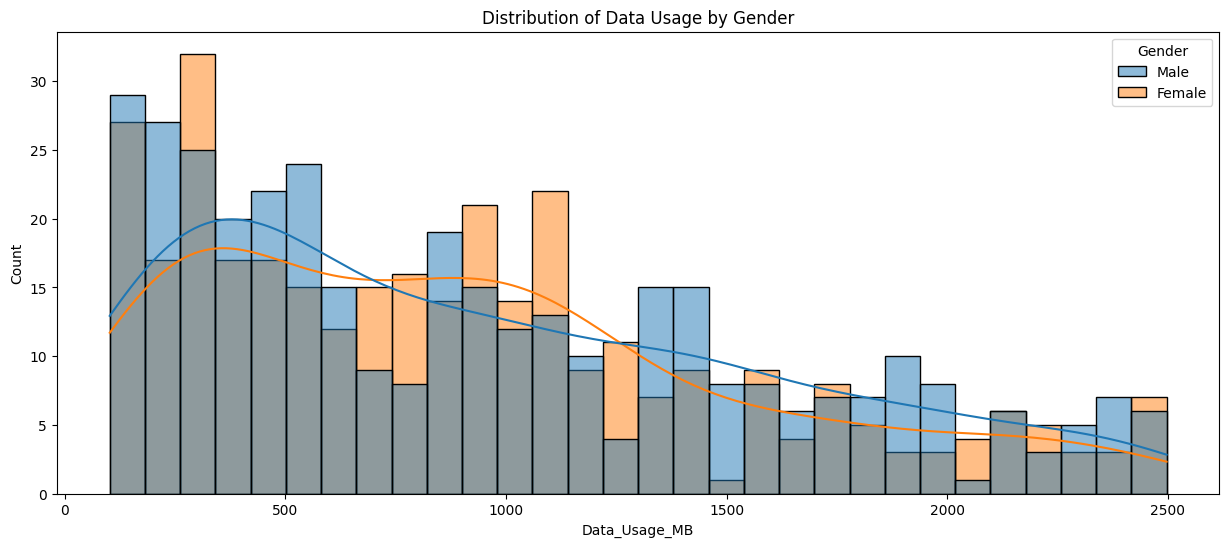

In [327]:
plt.figure(figsize=(15, 6))
sns.histplot(data=df, x='Data_Usage_MB', hue='Gender', bins=30, kde=True)
plt.title('Distribution of Data Usage by Gender')
plt.show()

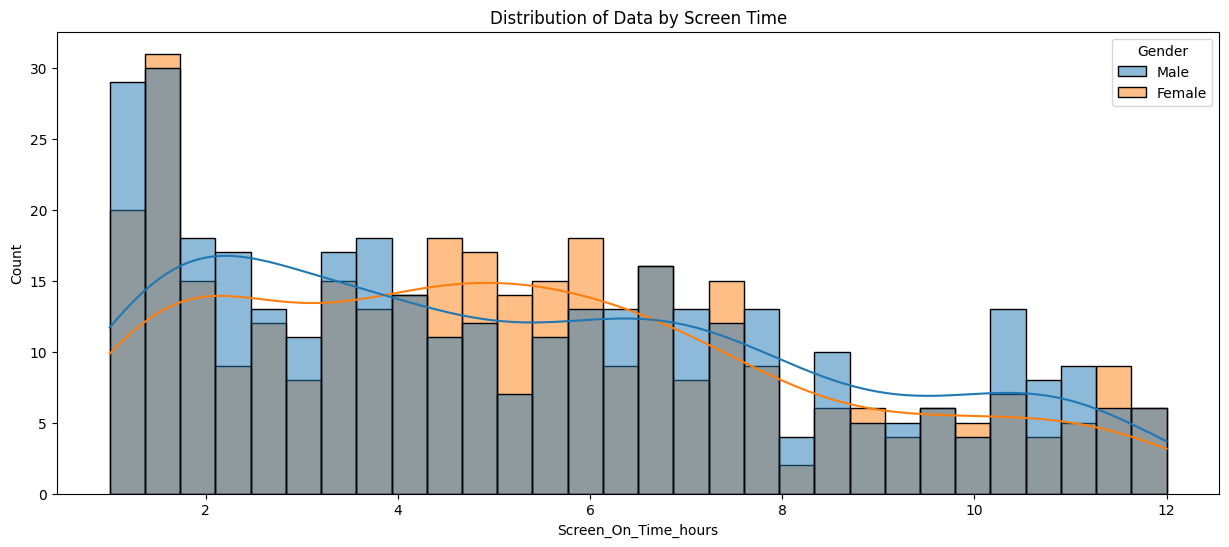

In [328]:
plt.figure(figsize=(15, 6))
sns.histplot(data=df, x='Screen_On_Time_hours', hue='Gender', bins=30, kde=True)
plt.title('Distribution of Data by Screen Time')
plt.show()


### Conclusion:

### Analysis of User Behavior: Summary of Findings

#### 1. **Gender Distribution by Device Model**:
   - The **Google Pixel 5**, **OnePlus 9**, and **Samsung Galaxy S21** are favored by male users, whereas the **Xiaomi** and **iPhone 12** attract a larger female audience. 
   - While these observations may not provide immediate benefits, they open the door for future investigations into how device preferences relate to user behavior and gender.

#### 2. **Gender Trends in Operating System Usage**:
   - **Android** platforms predominantly attract male users, likely due to their varied options and adaptability. In contrast, **iOS** maintains a relatively balanced gender ratio, appealing similarly to both males and females.

#### 3. **Age Preferences for Device Models**:
   - There appears to be no significant connection between device models and age, as popular models like the **Samsung Galaxy S21** and **iPhone 12** are well-received across different demographics, indicating a lack of distinct age or gender patterns.

#### 4. **Operating Systems and Age Representation**:
   - **Android** showcases a wider age diversity compared to **iOS**, which tends to attract younger users, possibly due to cost-effectiveness and a greater variety of devices for older individuals.

### Insights on App Usage:
- **Variability Across Age Groups**: Users demonstrate substantial variation in app usage times across all ages. Certain ages (e.g., 22, 31, 45) exhibit broader usage ranges, while others (e.g., 38, 41, 48) show more concentrated app usage.
- **Outliers in Older Demographics**: Some older users (ages 54, 59) report significantly higher app usage compared to their counterparts.

#### 5. **App Usage Discrepancies by Gender**:
   - Males often show higher median app usage times in certain age groups (e.g., 19, 26, 43), while females have higher medians in other ranges (e.g., 23, 34, 53, 58).
   - In some cases (e.g., ages 22, 32, 44), both genders exhibit similar median app usage, indicating comparable engagement levels.

#### 6. **Trends in Age-Related App Usage**:
- Users in their 20s demonstrate greater variability in app usage, whereas those in their 50s display more consistent behavior patterns.
- There isn’t a definitive trend of increasing or decreasing app usage with age, but certain ages (e.g., 21, 34, 53) stand out with notably higher usage times.

### Observations on Screen Time and Data Consumption:
- **Screen Time Clustering**: Distinct groupings based on screen time are evident, with battery drain patterns correlating with increased usage, especially during higher screen times (8–12 hours).
- **Data Consumption Trends**: The majority of users fall within the lower data consumption range (0–500 MB/day). Males typically peak around 500 MB, while females reach a slightly higher peak at 700 MB, indicating that heavier data usage (over 1000 MB/day) is relatively uncommon.

#### 7. **Gender Differences in Data Usage**:
- Male users generally surpass female users in the higher data consumption categories (1500–2500 MB/day), while females tend to dominate the moderate consumption range (500–1000 MB/day).

# Data Preprocessing 

In [329]:
df.shape

(700, 11)

In [330]:
df['Data_consumption_for_app']=df['App_Usage_Time_min']/df['Data_Usage_MB'] # Calculating average app usage time in minutes per megabyte
df['App_Usage_Prop']=df['App_Usage_Time_min']/(df['Screen_On_Time_hours']*60)  # Calculating app usage time as a fraction of total screen-on time.

In [331]:
df.shape

(700, 13)

In [332]:
df_int=df.select_dtypes(include=['int','float'])
df_int

,User ID,App_Usage_Time_min,Screen_On_Time_hours,Battery_Drain_mAh,Number of Apps Installed,Data_Usage_MB,Age,User Behavior Class,Data_consumption_for_app,App_Usage_Prop
0,1,393,6.4,1872,67,1122,40,4,0.350267,1.023438
1,2,268,4.7,1331,42,944,47,3,0.283898,0.950355
2,3,154,4.0,761,32,322,42,2,0.478261,0.641667
3,4,239,4.8,1676,56,871,20,3,0.274397,0.829861
4,5,187,4.3,1367,58,988,31,3,0.189271,0.724806
...,...,...,...,...,...,...,...,...,...,...
695,696,92,3.9,1082,26,381,22,2,0.241470,0.393162
696,697,316,6.8,1965,68,1201,59,4,0.263114,0.774510
697,698,99,3.1,942,22,457,50,2,0.216630,0.532258
698,699,62,1.7,431,13,224,44,1,0.276786,0.607843


<Axes: >

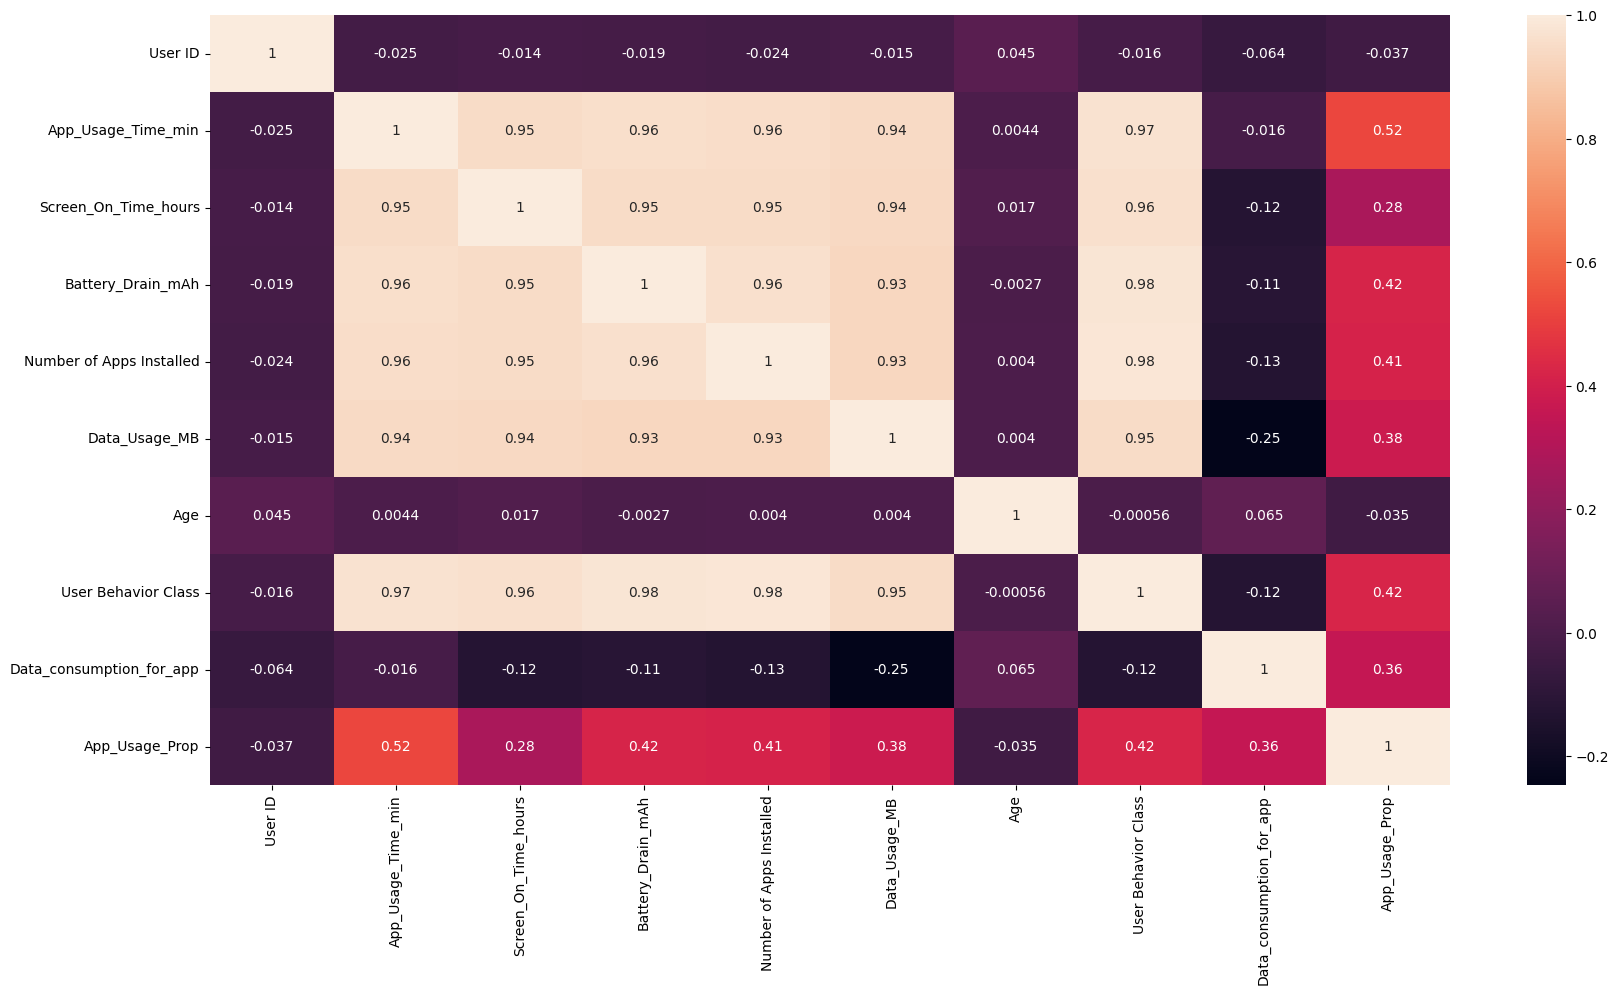

In [333]:
cor=df_int.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True)

In [334]:
# Converting String to Int 
label = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label.fit_transform(df[col])

In [335]:
df.shape

(700, 13)

In [336]:
# Split data in X and Y 
X=df.drop(columns=['User Behavior Class'])
Y=df['User Behavior Class']

In [337]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User ID                   700 non-null    int64  
 1   Device Model              700 non-null    int64  
 2   Operating System          700 non-null    int64  
 3   App_Usage_Time_min        700 non-null    int64  
 4   Screen_On_Time_hours      700 non-null    float64
 5   Battery_Drain_mAh         700 non-null    int64  
 6   Number of Apps Installed  700 non-null    int64  
 7   Data_Usage_MB             700 non-null    int64  
 8   Age                       700 non-null    int64  
 9   Gender                    700 non-null    int64  
 10  Data_consumption_for_app  700 non-null    float64
 11  App_Usage_Prop            700 non-null    float64
dtypes: float64(3), int64(9)
memory usage: 65.8 KB


In [338]:
print(X.shape)
print(Y.shape)

(700, 12)
(700,)


In [339]:
Scaler=StandardScaler()
for col in X.columns:
    X[col] = Scaler.fit_transform(X[[col]])

In [340]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.3,stratify=Y)

In [341]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('Y_train',Y_train.shape)
print('Y_test',Y_test.shape)

X_train (210, 12)
X_test (490, 12)
Y_train (210,)
Y_test (490,)


In [342]:
LR=LogisticRegression()
Dt=DecisionTreeClassifier()
Rfr=RandomForestClassifier()

In [343]:
# List of models
models = [LR, Dt, Rfr]
for model in models:
    print('----------------------Model Name-----------------------:', model)
    abc = model.fit(X_train, Y_train)
    Y_pred_Test = abc.predict(X_test)
    Y_pred_Train = abc.predict(X_train)
    
    print('Evaluation Metrics:')
    
    print('Accuracy_score_Y_test:', accuracy_score(Y_test, Y_pred_Test))
    print('Accuracy_score_Y_train:', accuracy_score(Y_train, Y_pred_Train))
    print('Classification Report for Test Data:')
    print(classification_report(Y_test, Y_pred_Test))
    print('Classification Report for Train Data:')
    print(classification_report(Y_train, Y_pred_Train))
    
    print('Confusion Matrix for Test Data:')
    print(confusion_matrix(Y_test, Y_pred_Test))
    print('Confusion Matrix for Train Data:')
    print(confusion_matrix(Y_train, Y_pred_Train))

----------------------Model Name-----------------------: LogisticRegression()
Evaluation Metrics:
Accuracy_score_Y_test: 0.9959183673469387
Accuracy_score_Y_train: 1.0
Classification Report for Test Data:
              precision    recall  f1-score   support

           1       0.99      0.99      0.99        95
           2       0.99      0.99      0.99       102
           3       1.00      1.00      1.00       100
           4       1.00      1.00      1.00        98
           5       1.00      1.00      1.00        95

    accuracy                           1.00       490
   macro avg       1.00      1.00      1.00       490
weighted avg       1.00      1.00      1.00       490

Classification Report for Train Data:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        43
           4       1.00      1.00      1.00        

### Conclusion:

In this evaluation of three models—**Logistic Regression, Decision Tree, and Random Forest**—all performed exceptionally well with high accuracy scores. 

- **Logistic Regression** achieved an accuracy of **99.8%** on the test data, indicating strong performance with a slight drop in recall for Class 3. 
- **Decision Tree** showed excellent train accuracy but a minor reduction in test accuracy (**99.2%**), suggesting potential overfitting.
- **Random Forest** outperformed both models with a perfect **100%** accuracy on both the training and testing datasets, demonstrating its robustness and ability to generalize well across different data splits.

Given the perfect test accuracy and balanced performance across all metrics, **Random Forest** is the best model for this classification task. It offers superior accuracy without overfitting, making it the most reliable choice for consistent and high-quality predictions in this scenario.